# Key takeaways

1. grid_to_graph, `sklearn.feature_extraction.grid_to_graph`, 没有搞明白这是干啥用的。
1. plt.clf(), Clear the current figure. plt.close() will close the figure window entirely, where plt.clf() will just clear the figure - you can still paint another plot onto it.
1. agglo.labels_
1. 清除坐标
   ~~~python

    plt.xticks(()) # 清除坐标
    plt.yticks(()) # 清除坐标
   ~~~
1. `subplot(nrows, ncols, index, **kwargs)`和`subplots(nrows=1, ncols=1)`是不同的函数。https://stackoverflow.com/questions/52214776/python-matplotlib-differences-between-subplot-and-subplots
    1. subplot在指定的行列画图
    1. subplots话指定行列数量的图
1. 聚类方法对比, https://scikit-learn.cn/stable/modules/clustering.html

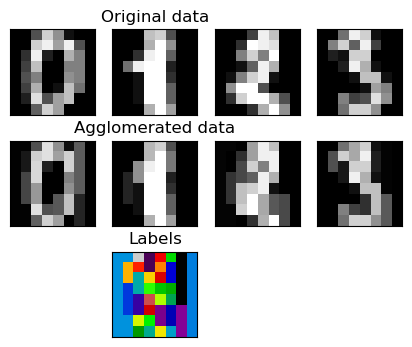

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.feature_extraction.image import grid_to_graph

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)

agglo.fit(X)
X_reduced = agglo.transform(X)

X_restored = agglo.inverse_transform(X_reduced)
images_restored = np.reshape(X_restored, images.shape)
plt.figure(1, figsize=(4, 3.5))
plt.clf()
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.91)
for i in range(4):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    plt.xticks(()) # 清除坐标
    plt.yticks(()) # 清除坐标
    if i == 1:
        plt.title("Original data")
    plt.subplot(3, 4, 4 + i + 1)
    plt.imshow(images_restored[i], cmap=plt.cm.gray, vmax=16, interpolation="nearest")
    if i == 1:
        plt.title("Agglomerated data")
    plt.xticks(())
    plt.yticks(())
    
plt.subplot(3, 4, 10)
plt.imshow(
    np.reshape(agglo.labels_, images[0].shape),
    interpolation="nearest",
    cmap=plt.cm.nipy_spectral,
)
plt.xticks(())
plt.yticks(())
plt.title("Labels")
plt.show()